In [2]:
import numpy as np
from pathlib import Path

dataset_folder = Path("D:\\dataset\\piano_triads")
dataset = list((dataset_folder / "piano_triads").iterdir())

audio = np.random.choice(dataset)
audio

WindowsPath('D:/dataset/piano_triads/piano_triads/A_maj_2_1.wav')

In [3]:
import pandas as pd

triads = pd.read_csv(dataset_folder / "triads.csv")
triads

,Chord,Note1,Note2,Note3
0,C_maj_2_0,C_2,E_2,G_2
1,C_maj_3_0,C_3,E_3,G_3
2,C_maj_4_0,C_4,E_4,G_4
3,C_maj_5_0,C_5,E_5,G_5
4,C_maj_6_0,C_6,E_6,G_6
...,...,...,...,...
355,B_min_3_1,B_4,D_4,Fs_4
356,B_min_4_1,B_5,D_5,Fs_5
357,B_min_5_1,B_6,D_6,Fs_6
358,B_min_6_1,B_7,D_7,Fs_7


In [4]:
triads[triads.Chord == audio.stem]

,Chord,Note1,Note2,Note3
270,A_maj_2_1,A_3,Cs_3,E_3


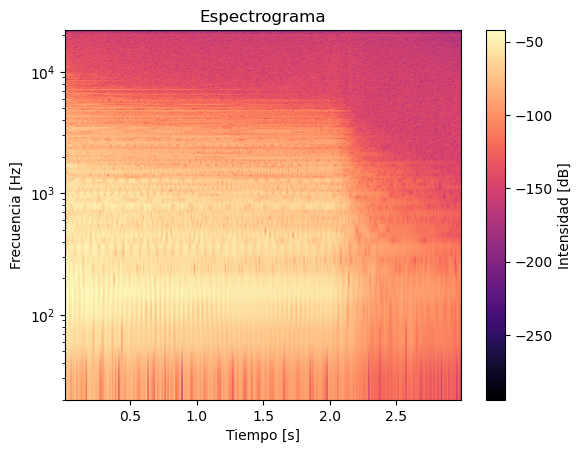

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Lee el archivo de audio
fs, data = wavfile.read(str(audio))  # fs = frecuencia de muestreo

# Si el audio es estéreo, toma un canal
if data.ndim > 1:
    data = data[:, 0]

# Calcula el espectrograma
plt.specgram(data, Fs=fs, NFFT=1024, noverlap=512, cmap="magma")

plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.title("Espectrograma")

plt.yscale("log")
plt.ylim(20, fs/2)  # limita a rango audible

plt.colorbar(label="Intensidad [dB]")
plt.show()

44100 44100


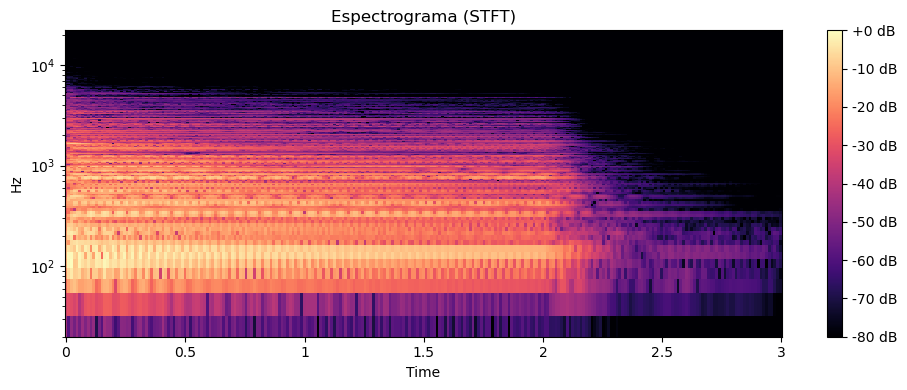

(array([[-9.9631868e-02+0.0000000e+00j, -4.5934349e-02+0.0000000e+00j,
          1.5077684e-02+0.0000000e+00j, ...,
          3.4103292e-04+0.0000000e+00j,  4.4907356e-04+0.0000000e+00j,
          2.7436637e-03+0.0000000e+00j],
        [-2.1686019e-01+1.3123050e-01j, -1.8235223e-02+3.6735501e-02j,
          2.4985518e-02+1.4967485e-01j, ...,
          1.1622908e-03-3.2800954e-04j, -2.1493703e-04-3.0206620e-05j,
         -1.8986510e-03+2.0589146e-03j],
        [-6.9733346e-01+2.0530999e-01j, -6.5702760e-01+8.3020622e-01j,
          3.2824817e-01+9.3911058e-01j, ...,
         -6.3016172e-04-4.1123116e-03j, -4.1250317e-04-5.1780912e-04j,
         -1.8557182e-03-3.2989006e-03j],
        ...,
        [-8.4307101e-07+7.2409151e-08j,  4.4449291e-07-7.5148677e-08j,
         -4.8528520e-08+6.1616412e-08j, ...,
          2.1637238e-10-3.8597882e-11j,  2.7939252e-06+8.3697578e-06j,
         -1.2181360e-05-3.6490521e-05j],
        [ 8.2047836e-07-4.9265584e-08j, -3.2729577e-08-3.6242625e-07j,
    

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Carga el audio
y, sr = librosa.load(str(audio), sr=None)  # sr=None para mantener la original
# Calcula el espectrograma (magnitud en escala dB)
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(S), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma (STFT)")
plt.tight_layout()

plt.yscale("log")
plt.ylim(20, sr/2)  # limita a rango audible

plt.show()
S, S_db